In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
#loading the csv into pandas Data Frame
url='https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv'
wine_dataset=pd.read_csv(url)

In [5]:
# number of row and columns in the data
wine_dataset.shape

(1599, 12)

In [6]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# Analizing the Data and its Visualization
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


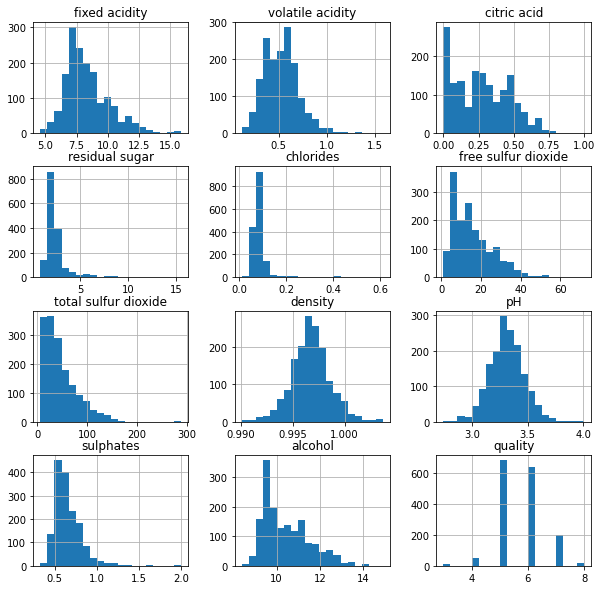

In [10]:
wine_dataset.hist(bins=20,figsize=(10,10))
#plot showing
plt.show()

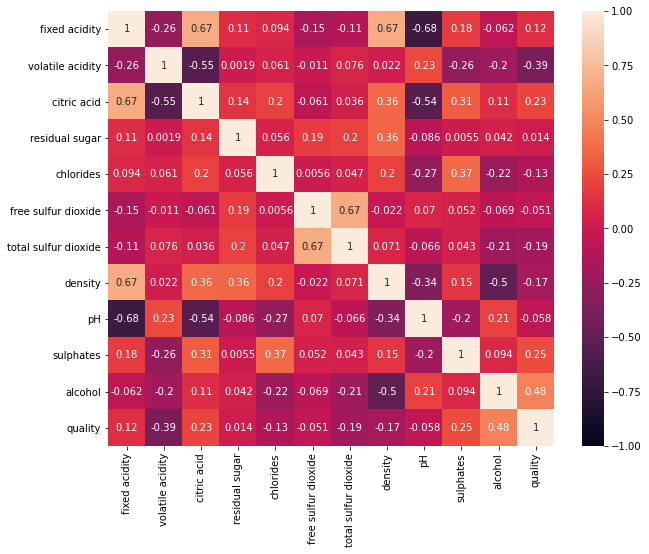

In [12]:
#visualizing the data for corelation between dependent and independent variables
plt.figure(figsize=(10,8))
sns.heatmap(wine_dataset.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

alcohol, sulphates, citric acid, fixed acidity majorly effect the quality (positively corelated)

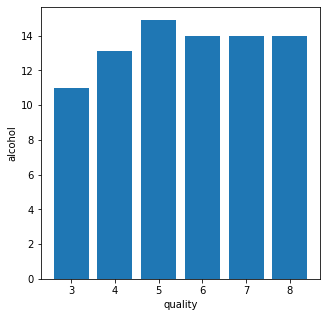

In [13]:
plt.figure(figsize=[5,5])
plt.bar(wine_dataset['quality'],wine_dataset['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

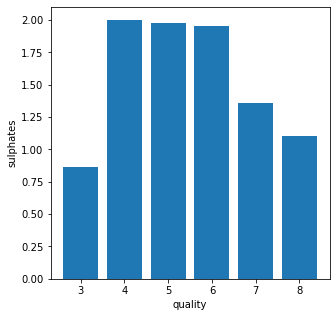

In [18]:
plt.figure(figsize=[5,5])
plt.bar(df['quality'],df['sulphates'])
plt.xlabel('quality')
plt.ylabel('sulphates')
plt.show()

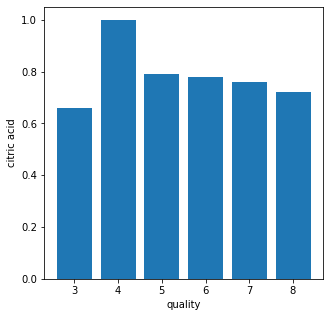

In [19]:
plt.figure(figsize=[5,5])
plt.bar(df['quality'],df['citric acid'])
plt.xlabel('quality')
plt.ylabel('citric acid')
plt.show()

In [14]:
# dropping the dependent variable from the dataset storing it in a new list
X= wine_dataset.drop('quality',axis=1)

In [16]:
print(X) 

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [17]:
# binarizating the quality of the wine good that is above 6 as 1 and bad as 0(6 or less than 6)
Y= wine_dataset['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [18]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [21]:
# Train & Test Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [22]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [24]:
# Training the Model 
# Using Random Forest Classifier
model = RandomForestClassifier()

In [25]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [26]:
# Evaluvating the trained model and see its accuracy
X_test_predict= model.predict(X_test)
test_data_accu= accuracy_score(X_test_predict, Y_test)


In [27]:
print('Accuracy :', test_data_accu)

Accuracy : 0.93125


The Above Model is great and has a high accuracy

In [31]:
# Building a predicting system (the input values are for quality 7 that is good quality) 
input_data = (7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5)
# converting the input into np array
input_data_numpy= np.asarray(input_data)

#reshaping the data to predict only for one value
input_data_reshape = input_data_numpy.reshape(1,-1)

prediction= model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==1):
    print('Good Quality Wine') 
else: 
    print('Bad Qaulity Wine')

[1]
Good Quality Wine
